In [80]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [10]:
data = pd.read_csv('dat/trainings_data.csv')
y = data['y']

In [12]:
def plot_p50_frequencies(y):
    """
    plots a histogram of the pLC50 values
    :param y: vector with pLC50 values
    """
    counts, bins = np.histogram(y, bins=20)
    plt.hist(bins[:-1], bins, weights=counts)
    plt.show()

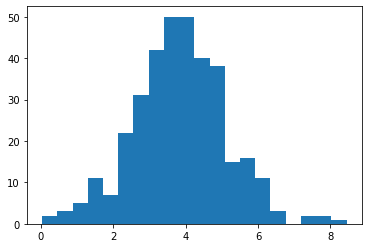

In [15]:
plot_p50_frequencies(y)

In [28]:
feature_list_cross_val = ['NumAromaticCarbocycles', 'MolLogP', 'HallKierAlpha', 'VSA_EState10', 'BCUT2D_LOGPHI', 'PEOE_VSA14', 'FractionCSP3', 'PEOE_VSA6']
data_final = data[feature_list_cross_val]

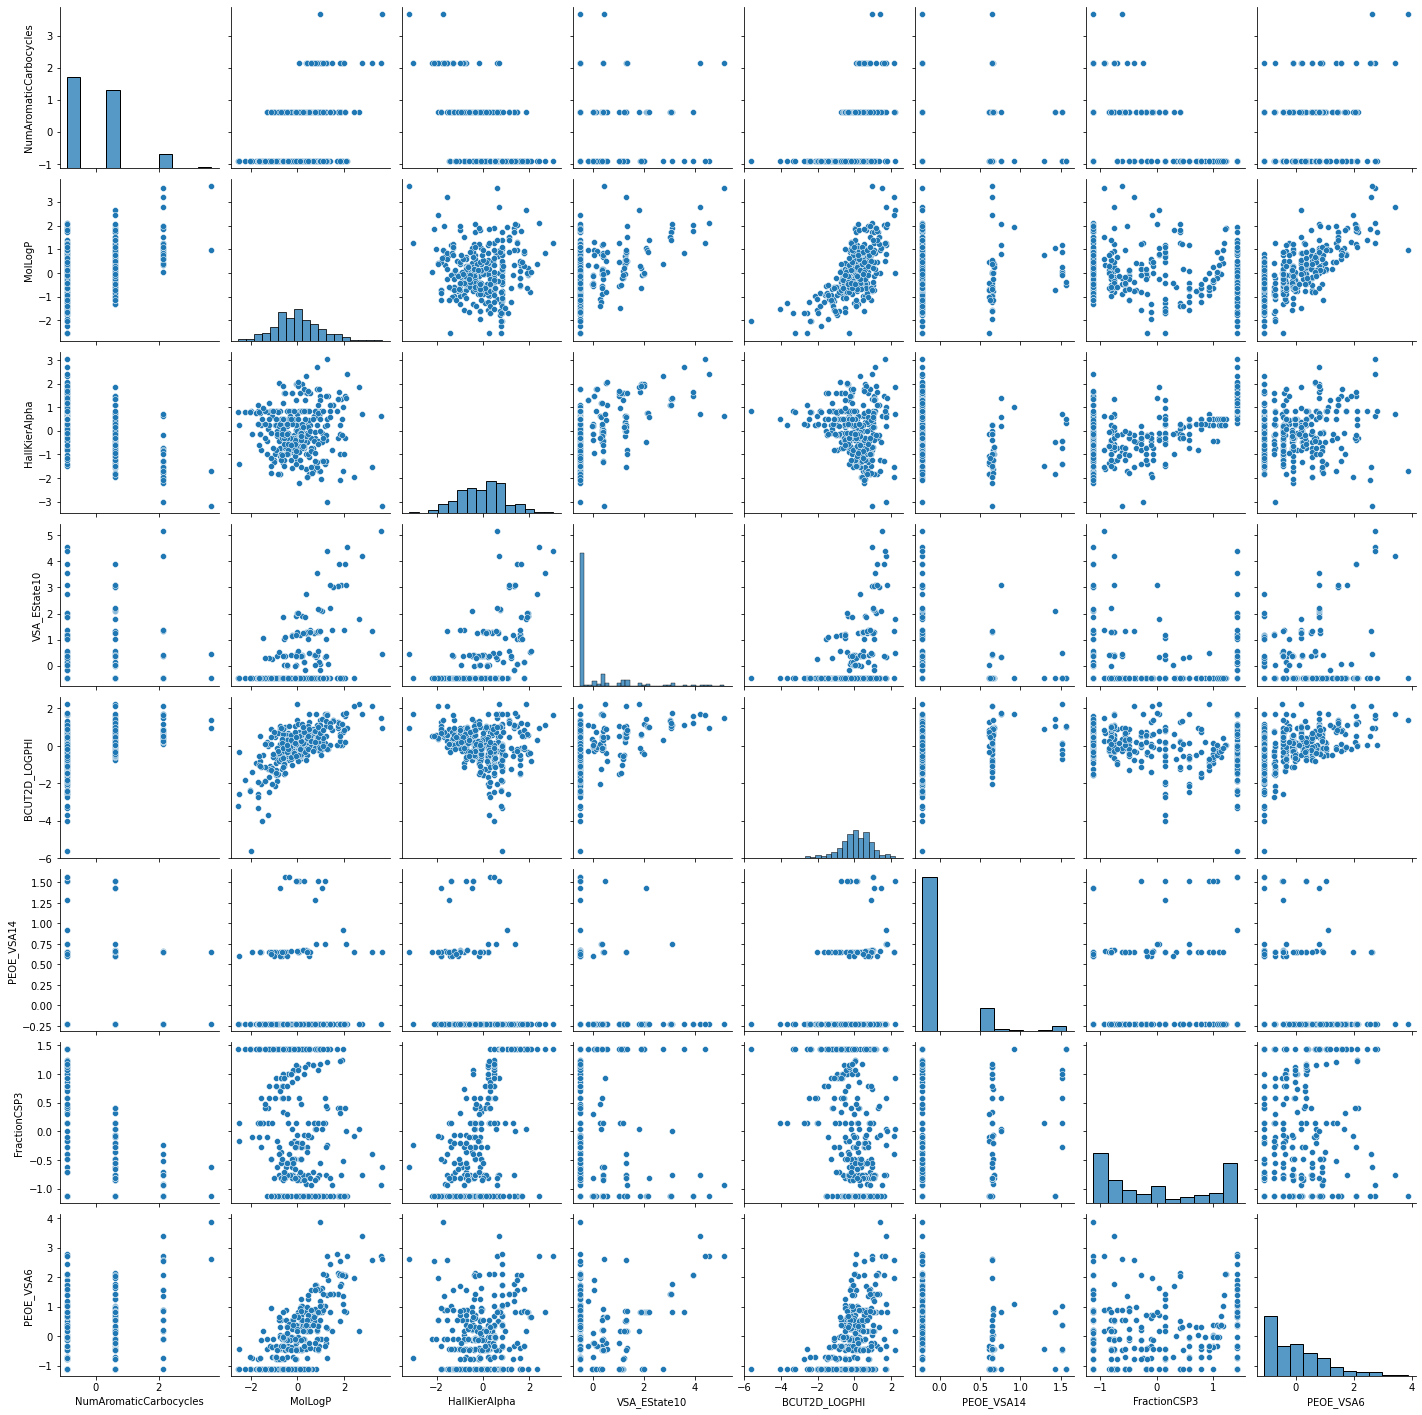

In [29]:
sns.pairplot(data_final)

In [41]:
test_data = pd.read_csv('test_pred.csv')
test_data = test_data.iloc[:,1:]
y = test_data['y']
y_pred = test_data['y_pred']
test_data = test_data.drop(['y', 'y_pred'], axis=1)
test_data

,NumAromaticCarbocycles,MolLogP,HallKierAlpha,VSA_EState10,BCUT2D_LOGPHI,PEOE_VSA14,FractionCSP3,PEOE_VSA6
0,-0.906821,-0.714535,0.484529,-0.486528,-0.695861,-0.219549,0.924902,-0.331891
1,-0.906821,1.082031,0.844112,-0.486528,-0.012871,-0.219549,1.437898,2.101465
2,0.620456,-0.722139,-1.226592,-0.486528,0.942708,-0.219549,-0.557088,-1.090075
3,0.620456,-0.181128,-0.730615,-0.486528,0.047108,-0.219549,-0.557088,-1.090075
4,0.620456,0.128398,-0.643819,-0.486528,-0.247192,-0.219549,-0.842086,0.239048
...,...,...,...,...,...,...,...,...
111,-0.906821,-0.821712,0.794515,-0.486528,-0.268669,-0.219549,1.437898,-1.090075
112,-0.906821,0.302252,1.650075,1.850484,-0.132315,-0.219549,-1.127084,0.815466
113,0.620456,-0.684598,-0.321434,-0.486528,-0.556066,-0.219549,-1.127084,-0.093629
114,0.620456,1.036726,-0.073445,-0.486528,-0.166529,-0.219549,0.038817,1.652872


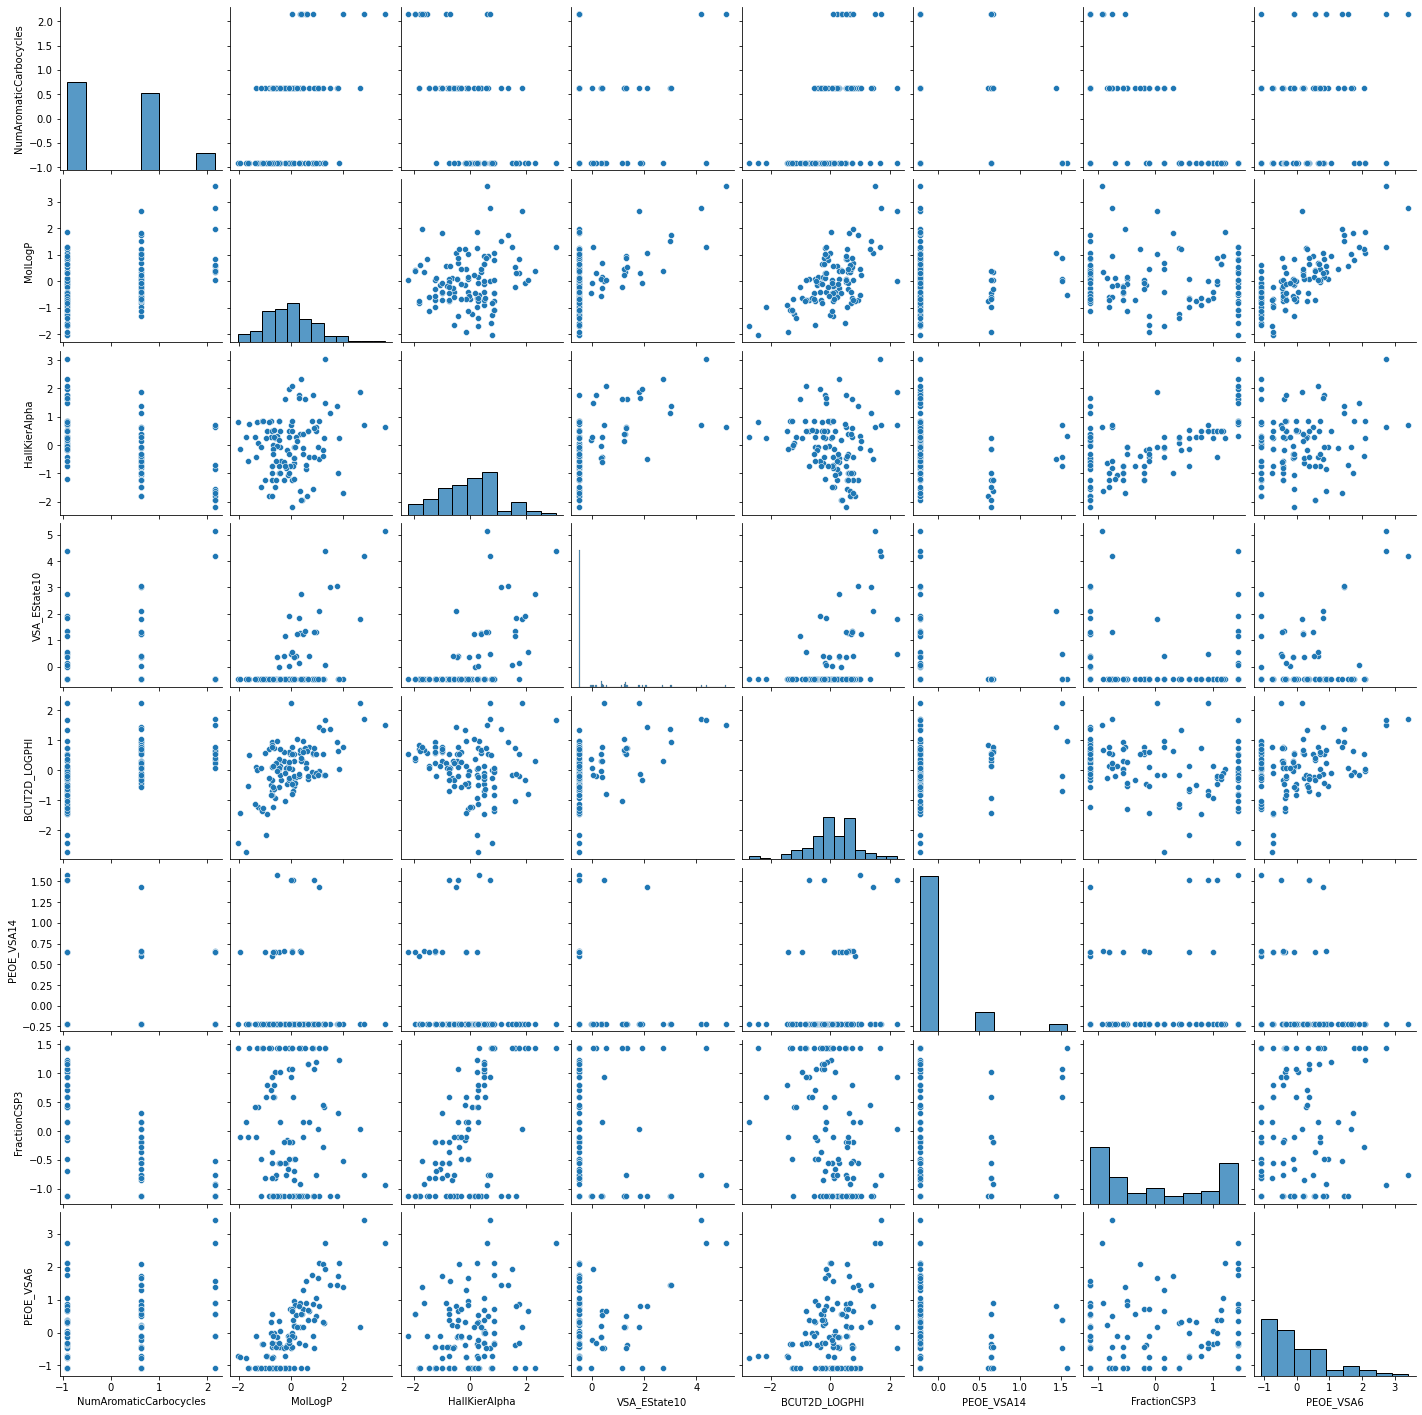

In [42]:
sns.pairplot(test_data)

In [46]:
def get_residuals(y, y_pred):
    return y - y_pred

resid = get_residuals(y, y_pred)

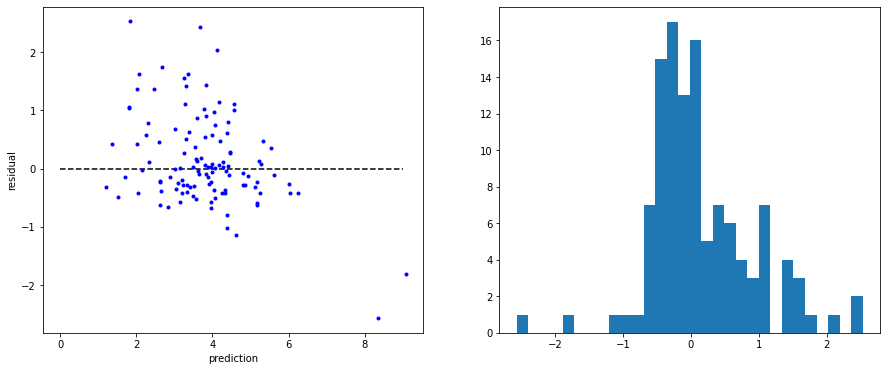

In [68]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(y_pred, resid, 'b.')
plt.hlines(0,0,9, linestyle='dashed', color='black');
plt.xlabel('prediction')
plt.ylabel('residual');
plt.subplot(122)
plt.hist(resid, bins=30);


In [59]:
resid[resid<-1.5]

73   -1.803345
77   -2.562786
dtype: float64

In [63]:
y[resid<-1.5]

73    7.287
77    5.788
Name: y, dtype: float64

In [71]:
y[resid>2]

7     6.087
31    6.161
33    4.370
Name: y, dtype: float64

In [77]:
data[data.y == 4.370]

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_aryl_methyl,fr_benzene,fr_bicyclic,fr_ether,fr_halogen,fr_unbrch_alkane,y
119,1.243703,-2.633307,1.243703,-0.760717,-0.723581,2.54325,2.46258,2.555405,2.500046,1.504629,...,-0.282386,-0.155598,-0.213446,-0.338185,-0.906821,-0.119098,2.731713,-0.508876,-0.339894,4.37


In [78]:
predicted_to_much = [16, 110]
predicted_to_less = [227, 177, 119]